# TASK #1: IMPORT DATA AND PERFORM EXPLORATORY DATA ANALYSIS

data source: https://www.kaggle.com/datasets/sid321axn/amazon-alexa-reviews

In [2]:
#Amazon Reviews

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import wordcloud as wc
import string
import nltk
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

In [3]:
amazon_df = pd.read_csv("C:\\Users\\talha\\Downloads\\amazon_reviews.csv")

In [4]:
amazon_df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [5]:
amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [6]:
amazon_df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [7]:
bad = amazon_df[amazon_df['feedback']==0]
good = amazon_df[amazon_df['feedback']==1]

In [8]:
bad

,rating,date,variation,verified_reviews,feedback
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0
...,...,...,...,...,...
3047,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,0
3048,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0
3067,2,30-Jul-18,Black Dot,The only negative we have on this product is t...,0
3091,1,30-Jul-18,Black Dot,I didn’t order it,0


In [9]:
good

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [10]:
amazon_df[amazon_df['rating']==3]

,rating,date,variation,verified_reviews,feedback
6,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1
24,3,30-Jul-18,Sandstone Fabric,"I got a second unit for the bedroom, I was exp...",1
33,3,30-Jul-18,Heather Gray Fabric,The speakers sound pretty good for being so sm...,1
49,3,30-Jul-18,Charcoal Fabric,No different than Apple. To play a specific li...,1
54,3,30-Jul-18,Sandstone Fabric,like google better,1
...,...,...,...,...,...
3059,3,30-Jul-18,White Dot,Works well. Just disappointed with the speaker...,1
3068,3,30-Jul-18,White Dot,I was hoping the cord was white also. Otherwis...,1
3114,3,30-Jul-18,Black Dot,,1
3122,3,30-Jul-18,Black Dot,I dislike that it confuses my requests all the...,1


In [11]:
bad_sentences = bad['verified_reviews'].tolist()
good_sentences = good['verified_reviews'].tolist()
bad_sentences_string = " ".join(bad_sentences)
good_sentences_string = " ".join(good_sentences)

<Axes: xlabel='rating', ylabel='count'>

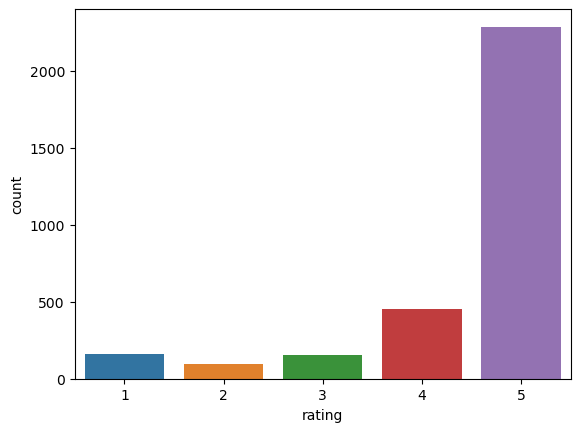

In [12]:
sns.countplot(amazon_df,x='rating')

<Axes: xlabel='feedback', ylabel='count'>

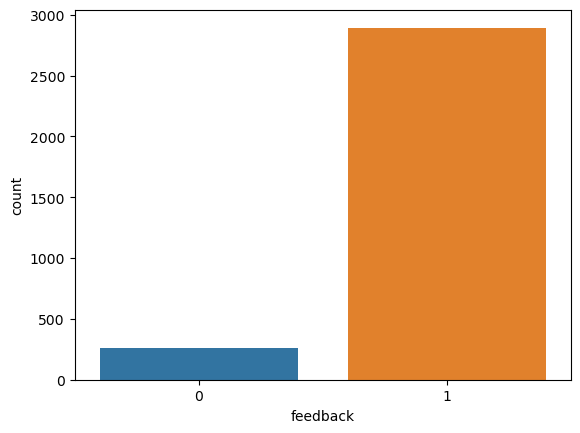

In [13]:
sns.countplot(amazon_df,x='feedback')

<Axes: xlabel='count', ylabel='variation'>

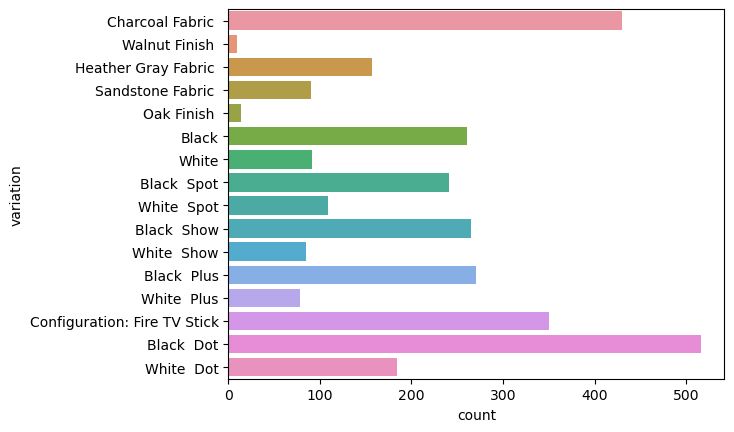

In [21]:
sns.countplot(amazon_df,y='variation')

<Axes: ylabel='Frequency'>

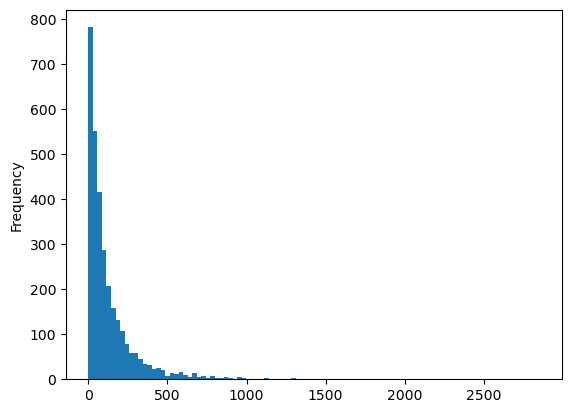

In [22]:
amazon_df['length'] = amazon_df['verified_reviews'].apply(len)
amazon_df['length'].plot(bins=100, kind='hist')

# TASK #2: PLOT WORDCLOUD

In [23]:
dark_cloud=wc.WordCloud().generate(bad_sentences_string)

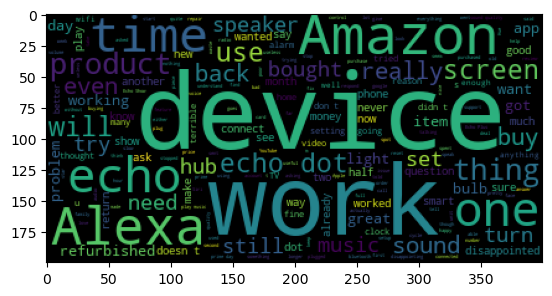

In [25]:
plt.imshow(dark_cloud)

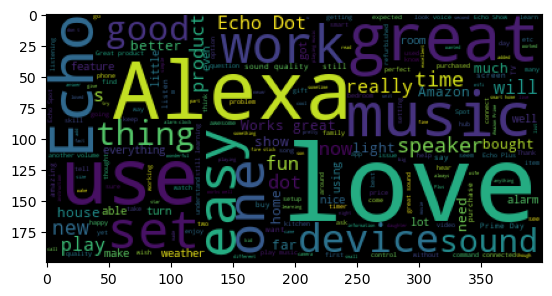

In [26]:
light_cloud=wc.WordCloud().generate(good_sentences_string)
plt.imshow(light_cloud)

# TASK #3: PERFORM DATA CLEANING

In [27]:
def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [28]:
amazon_df_review_clean = amazon_df['verified_reviews'].apply(message_cleaning)

# TASK #4: PERFORM COUNT VECTORIZATION (TOKENIZATION)

In [29]:
vectorizer = CountVectorizer(analyzer = message_cleaning, dtype = np.uint8)
review_countvectorizer = vectorizer.fit_transform(amazon_df['verified_reviews'])
print(review_countvectorizer.toarray())
print(vectorizer.get_feature_names_out())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['072318' '1' '10' ... '😬' '😳' '🤓']


In [30]:
review_countvectorizer.shape

(3150, 5211)

In [31]:
X = pd.DataFrame(review_countvectorizer.toarray())
y = amazon_df['feedback']

In [32]:
y

0       1
1       1
2       1
3       1
4       1
       ..
3145    1
3146    1
3147    1
3148    1
3149    1
Name: feedback, Length: 3150, dtype: int64

In [33]:
y.shape

(3150,)

In [34]:
X.shape

(3150, 5211)

# TASK #5: TRAIN AND TEST AI/ML MODELS

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)


In [36]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

In [37]:
from sklearn.metrics import classification_report, confusion_matrix

<Axes: >

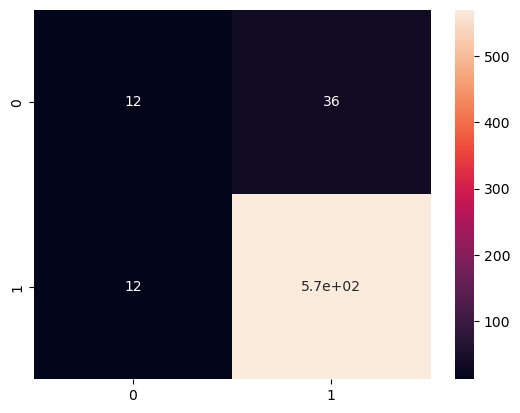

In [38]:
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [39]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.50      0.25      0.33        48
           1       0.94      0.98      0.96       582

    accuracy                           0.92       630
   macro avg       0.72      0.61      0.65       630
weighted avg       0.91      0.92      0.91       630



In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

<Axes: >

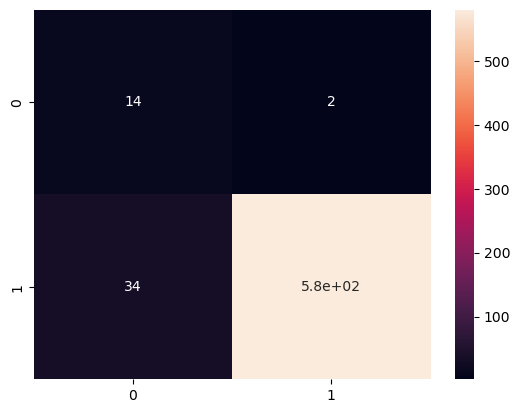

In [42]:
y_pred = model.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.29      0.44        48
           1       0.94      1.00      0.97       582

    accuracy                           0.94       630
   macro avg       0.91      0.64      0.70       630
weighted avg       0.94      0.94      0.93       630



In [44]:
from sklearn.ensemble import GradientBoostingClassifier

In [46]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

GradientBoostingClassifier()

<Axes: >

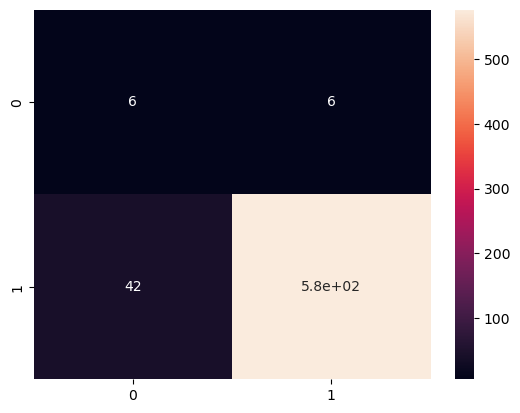

In [47]:
y_pred = model.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.12      0.20        48
           1       0.93      0.99      0.96       582

    accuracy                           0.92       630
   macro avg       0.72      0.56      0.58       630
weighted avg       0.90      0.92      0.90       630

